<a href="https://colab.research.google.com/github/CodeWithMayank-Py/ML-Models/blob/main/horses_or_humans_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import os, random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
# see the tensorflow version
tf.__version__

'2.14.0'

In [ ]:
# Download data
train, valid, test = tfds.load('horses_or_humans', split=['train','train[:50%]','test[50%:]'],as_supervised=True,
                               batch_size=32,shuffle_files=True)
print('Element in training data: ',train.element_spec)
print('Element in valid data: ',valid.element_spec)
print('Element in test data: ',test.element_spec)
print('Image count:',train.cardinality()*32)
print('Image count:',valid.cardinality()*32)
print('Image count:',test.cardinality()*32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteFX2YNN/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteFX2YNN/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
Element in training data:  (TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
Element in valid data:  (TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
Element in test data:  (TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
Image count: tf.Tensor(1056, shape=(), dtype=int64)
Image count: tf.Tensor(544, shape=(), dtype=int64)
Image count: tf.Tensor(128, shape=(), dtype=int64)


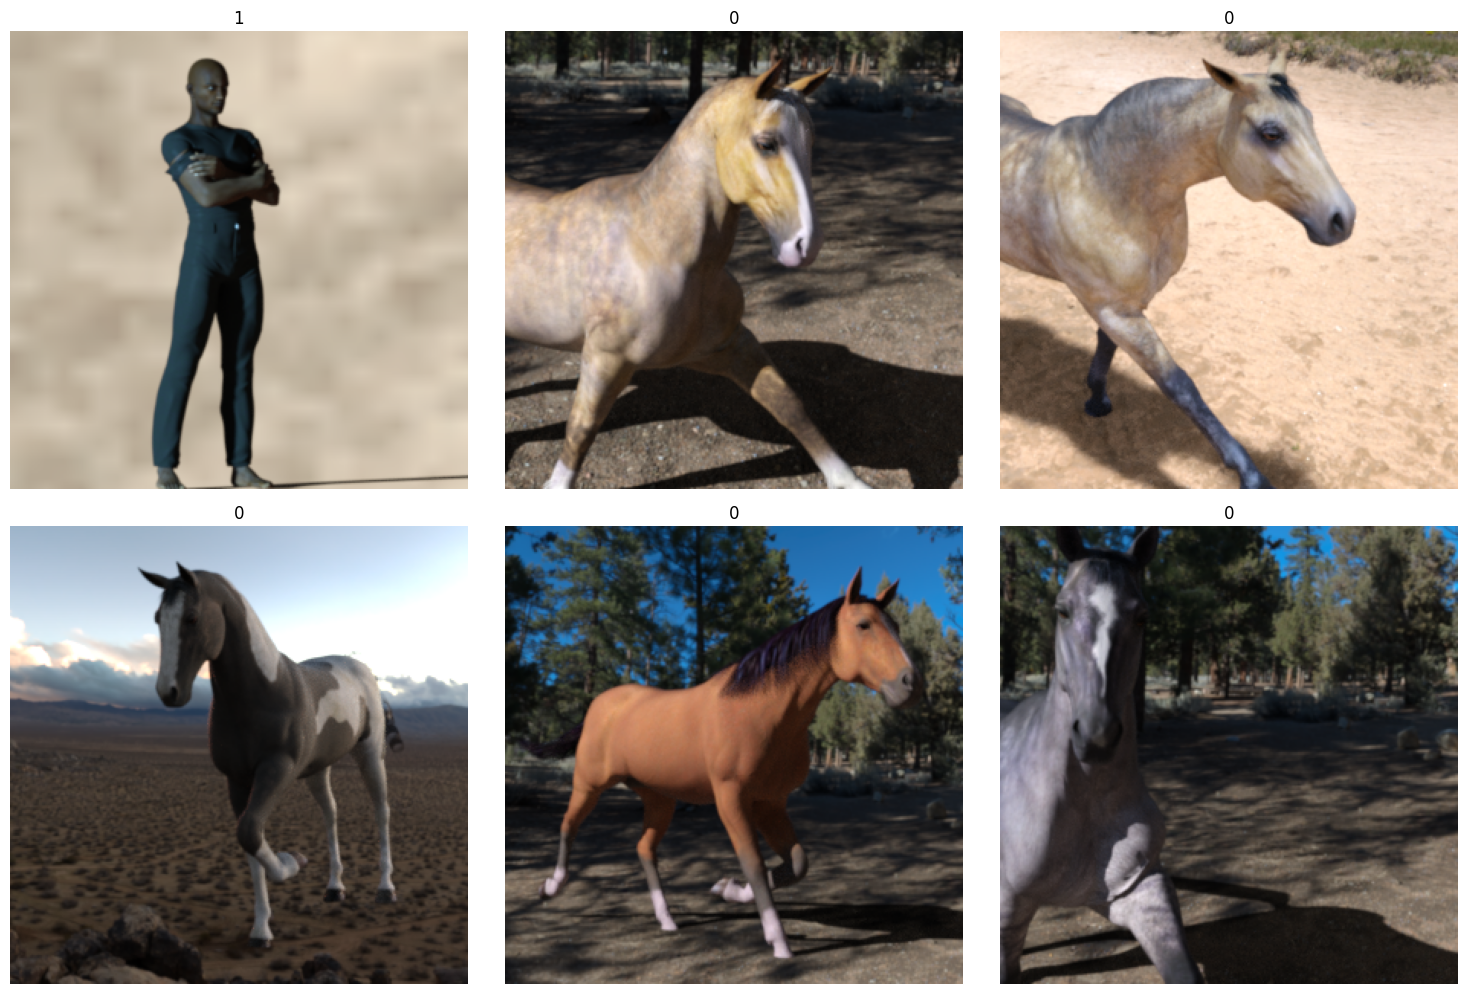

In [ ]:
# make plot data
for images, labels in train.take(1):break
images_to_plot : int=6
plt.figure(figsize=(15,15))
for index in range(images_to_plot):
  plt.subplot(3,3,index+1)
  plt.imshow(images[index].numpy().astype('uint8'))
  plt.axis('off')
  plt.title(labels[index].numpy())
plt.tight_layout()
plt.show()

In [ ]:
print("Maximum pixel values: ", tf.reduce_max(images))
print("Minimum pixel values: ", tf.reduce_min(images))
print("Shape of inputs (X): ", images.shape)
print("Object type of inputs (X): ", type(images))
print("Data Type in inputs (X): ", images.dtype)
print("Object type of outputs (y): ", type(labels))
print("Data type in outputs (X): ", labels.dtype)

In [ ]:
resizing_layer = tf.keras.layers.Resizing(height=128, width=128, interpolation="nearest")
train=train.map(lambda images,labels: (resizing_layer(images),labels))
valid=valid.map(lambda images,labels: (resizing_layer(images),labels))
test=test.map(lambda images,labels: (resizing_layer(images),labels))

In [ ]:
# Make apply data augmentation

random_flip = tf.keras.layers.RandomFlip('horizontal_and_vertical', name='random_flip')
random_zoom = tf.keras.layers.RandomZoom(height_factor = 0.1, width_factor=0.1, name='random_zoom')
random_rotate = tf.keras.layers.RandomRotation(0.3, name='random_rotate')
random_brightness = tf.keras.layers.RandomBrightness(0.3, value_range=(0.0, 255.0), name='random_brightness')
augmentations = [random_flip, random_zoom, random_rotate, random_brightness]

# make apply augmentation on training data
for augmentation in augmentations:
  train = train.map(lambda images, labels: (augmentation(images), labels))

In [ ]:
# make plot data
for images, labels in train.take(1):break
images_to_plot : int=6
plt.figure(figsize=(15,15))
for index in range(images_to_plot):
  plt.subplot(3,3,index+1)
  plt.imshow(images[index].numpy().astype('uint8'))
  plt.axis('off')
  plt.title(labels[index].numpy())
plt.tight_layout()
plt.show()

In [ ]:
print("Maximum pixel values: ", tf.reduce_max(images))
print("Minimum pixel values: ", tf.reduce_min(images))
print("Shape of inputs (X): ", images.shape)
print("Object type of inputs (X): ", type(images))
print("Data Type in inputs (X): ", images.dtype)
print("Object type of outputs (y): ", type(labels))
print("Data type in outputs (X): ", labels.dtype)

In [ ]:
'''
model = tf.keras.Sequential(layers=None, name='resisc45_classifier')
# add rescaling layer to rescale inputs from (0, 255) to (0, 1)
model.add(tf.keras.layers.Rescaling(1./255., offset=0, name='rescaling_01', input_shape=(128, 128, 3)))

# first forward passs
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

# Second forward passs
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

# Third forward passs
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Dense(120))
'''

In [ ]:
model = tf.keras.Sequential(layers=None, name='resisc45_classifier')
# add rescaling layer to rescale inputs from (0, 255) to (0, 1)
model.add(tf.keras.layers.Rescaling(1./255., offset=0, name='rescaling_01', input_shape=(128, 128, 3)))

# first forward pass
model.add(tf.keras.layers.Conv2D(32,(3,3),activation=None))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Conv2D(32,(3,3),activation=None))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPool2D())

# second forward pass
model.add(tf.keras.layers.Conv2D(64,(3,3),activation=None))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Conv2D(64,(3,3),activation=None))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPool2D())

# third forward pass
model.add(tf.keras.layers.Conv2D(128,(3,3),activation=None))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Conv2D(128,(3,3),activation=None))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPool2D())

# add fully connected (dense) map to network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1024,))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(120))

In [ ]:
model.summary(120)

**Model Training**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1,
                                                mode='auto', restore_best_weights=True)

# make train model
history = model.fit(train, batch_size=128, epochs=10_000, verbose=2, callbacks=[early_stop],
                    validation_split=0, validation_data=valid, shuffle=True)

Epoch 1/10000
33/33 - 161s - loss: 2.2451 - sparse_categorical_accuracy: 0.4752 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.4650 - 161s/epoch - 5s/step
Epoch 2/10000
33/33 - 153s - loss: 1.0817 - sparse_categorical_accuracy: 0.4869 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.4650 - 153s/epoch - 5s/step
Epoch 3/10000
33/33 - 153s - loss: 1.4328 - sparse_categorical_accuracy: 0.4859 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.4650 - 153s/epoch - 5s/step
Epoch 4/10000
33/33 - 149s - loss: 1.1185 - sparse_categorical_accuracy: 0.4869 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.4650 - 149s/epoch - 5s/step
Epoch 5/10000
33/33 - 142s - loss: 0.8618 - sparse_categorical_accuracy: 0.4869 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.4650 - 142s/epoch - 4s/step
Epoch 6/10000
33/33 - 141s - loss: 0.8168 - sparse_categorical_accuracy: 0.4869 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.4650 - 141s/epoch - 4s/step
Epoch 7/10000
33